In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os
import keras
print(os.listdir("../input"))
os.environ['CUDA_VISIBLE_DEVICES'] = '0, 1'

Using TensorFlow backend.


[]


In [2]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train[0], train[1]
x_test, y_test = test[0], test[1]

170500096/170498071 [==============================] - 6s 0us/step


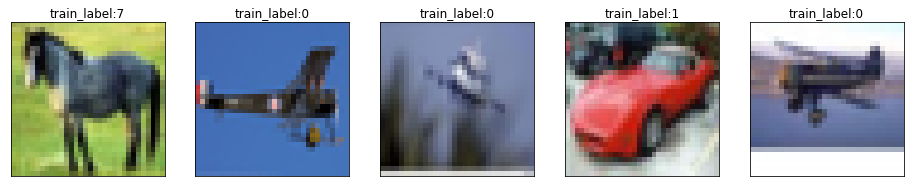

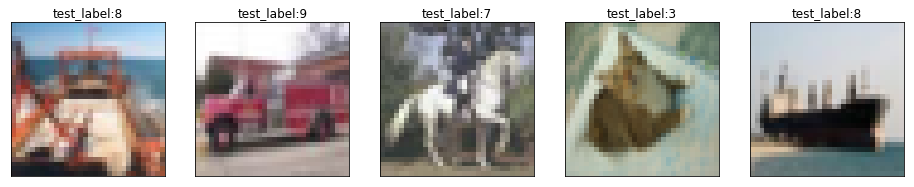

In [3]:
SEED = 124
fig = plt.figure(figsize=(16, 3))
fig2 = plt.figure(figsize=(16, 3))
for idx in range(5):
    train_num = np.random.choice(len(x_train))
    test_num = np.random.choice(len(x_test))
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    ax2 = fig2.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    ax.imshow(x_train[train_num], cmap='gray')
    ax.set_title('train_label:'+str(y_train[train_num][0]))
    ax2.imshow(x_test[test_num], cmap='gray')
    ax2.set_title('test_label:'+str(y_test[test_num][0]))

# Preprocessing

In [4]:
def preprocessing(x, flatten=True):
    x = x/255
    if flatten:
        x = x.reshape(len(x), -1)
    return x

def Label_OHE(y, num_classes=10):
    y = keras.utils.to_categorical(y, num_classes=num_classes )
    return y

x_train, x_test = preprocessing(x_train), preprocessing(x_test)
y_train, y_test = Label_OHE(y_train), Label_OHE(y_test)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 3072) (50000, 10)
(10000, 3072) (10000, 10)


# Create model

In [5]:
def build_mlp(input_shape=(x_train.shape[1],), output_shape=10, hidden_layer= [512, 256, 128, 64, 32]):
    keras.backend.clear_session()
    input_layer = keras.layers.Input(shape=input_shape)
    for idx, h in enumerate(hidden_layer):
        if idx == 0:
            x = keras.layers.Dense(h, activation='relu')(input_layer)
        else:
            x = keras.layers.Dense(h, activation='relu')(x)
    output_layer = keras.layers.Dense(output_shape, activation='softmax')(x)
    model = keras.models.Model(inputs=input_layer, outputs=[output_layer])
    return model


model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total para

In [6]:
def build_mlp_by_sequtial(input_shape=(x_train.shape[1],), output_shape=10, hidden_layer= [512, 256, 128, 64]):
    keras.backend.clear_session()
    model = keras.Sequential()
    
    for idx, h in enumerate(hidden_layer):
        if idx == 0:
            model.add(keras.layers.Dense(h, input_shape=input_shape))
            model.add(keras.layers.Activation('relu'))
        else:
            model.add(keras.layers.Dense(h))
            model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dense(output_shape))
    model.add(keras.layers.Activation('softmax'))
    return model

model = build_mlp_by_sequtial()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
__________

# Hyperparameters

In [7]:
LEARNING_RATE = 1e-3
EPOCHS = 100
BATCH_SIZE = 256
MOMENTUM = 0.95
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)

# Training

In [8]:
def train_model(model, EPOCHSOCHSOCHS, BATCH_SIZE, optimizer):
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data= (x_test, y_test),
              shuffle=True
             )
    return model
model = train_model(model, EPOCHS, BATCH_SIZE, optimizer)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 86us/step - loss: 2.0600 - acc: 0.2503 - val_loss: 1.8769 - val_acc: 0.3254
Epoch 2/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.8082 - acc: 0.3589 - val_loss: 1.7525 - val_acc: 0.3839
Epoch 3/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.7160 - acc: 0.3927 - val_loss: 1.6797 - val_acc: 0.4023
Epoch 4/100
50000/50000 [==============================] - 2s 35us/step - loss: 1.6543 - acc: 0.4134 - val_loss: 1.6321 - val_acc: 0.4227
Epoch 5/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.6056 - acc: 0.4299 - val_loss: 1.5872 - val_acc: 0.4387
Epoch 6/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.5639 - acc: 0.4477 - val_loss: 1.5590 - val_acc: 0.4437
Epoch 7/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.5277 - acc: 0.4604 - val_loss: 1.5581 - 

# Loss & Metrics

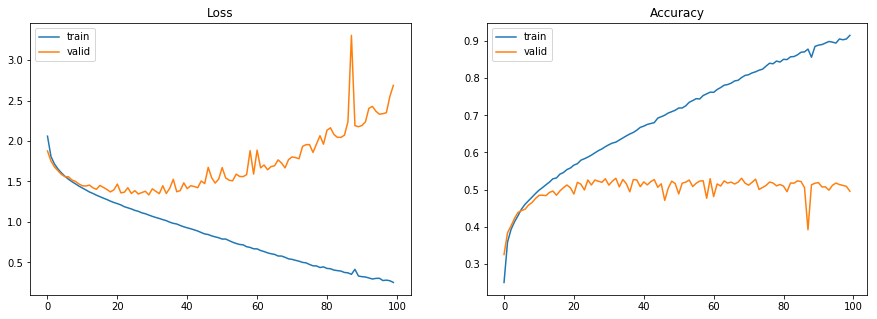

In [9]:
def show_result(model, ax1, ax2):
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    for idx, i in enumerate([train_loss, valid_loss, train_acc, valid_acc]):
        if idx % 2:
            label='valid'
        else:
            label = 'train'
        if idx < 2:
            ax1.plot(i, label=label)
            ax1.set_title('Loss')
            ax1.legend()
        else:
            ax2.plot(i, label=label)
            ax2.set_title('Accuracy')
            ax2.legend()
fig = plt.figure(figsize=[15, 5])
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
show_result(model, ax1, ax2)

# Learning Rate Search

In [10]:
LEARNING_RATE_LIST = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
result = {}
for LR in LEARNING_RATE_LIST:
    #create new mlp model
    model = build_mlp()
    model.summary()
    #set HPs
    LEARNING_RATE = LR
    EPOCHS = 100
    BATCH_SIZE = 256
    MOMENTUM = 0.95
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    #training
    model = train_model(model, EPOCHS, BATCH_SIZE, optimizer)
    #record result
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    result[str(LR)] = {'train_loss': model.history.history['loss'],
                       'valid_loss': model.history.history['val_loss'],
                       'train_acc': model.history.history['acc'],
                       'valid_acc': model.history.history['val_acc']
                      }
                    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total para

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 31us/step - loss: 1.9140 - acc: 0.3032 - val_loss: 1.6910 - val_acc: 0.3941
Epoch 2/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.6339 - acc: 0.4119 - val_loss: 1.7884 - val_acc: 0.3757
Epoch 3/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.5419 - acc: 0.4476 - val_loss: 1.5349 - val_acc: 0.4498
Epoch 4/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.4800 - acc: 0.4699 - val_loss: 1.6079 - val_acc: 0.4327
Epoch 5/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.4265 - acc: 0.4891 - val_loss: 1.5925 - val_acc: 0.4358
Epoch 6/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.3887 - acc: 0.5022 - val_loss: 1.4330 - val_acc: 0.4903
Epoch 7/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.3553 - acc: 0.5140 - val_loss: 1.4509 - 

50000/50000 [==============================] - 1s 24us/step - loss: 1.5205 - acc: 0.4577 - val_loss: 1.5253 - val_acc: 0.4540
Epoch 9/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.4864 - acc: 0.4704 - val_loss: 1.4887 - val_acc: 0.4644
Epoch 10/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.4540 - acc: 0.4837 - val_loss: 1.4853 - val_acc: 0.4630
Epoch 11/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.4272 - acc: 0.4900 - val_loss: 1.4690 - val_acc: 0.4705
Epoch 12/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.4037 - acc: 0.4987 - val_loss: 1.4749 - val_acc: 0.4699
Epoch 13/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.3764 - acc: 0.5065 - val_loss: 1.4292 - val_acc: 0.4873
Epoch 14/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.3523 - acc: 0.5154 - val_loss: 1.4666 - val_acc: 0.4706
Epoch 15/100
50000/50000 [===============

50000/50000 [==============================] - 1s 25us/step - loss: 0.5248 - acc: 0.8128 - val_loss: 1.7903 - val_acc: 0.5220
Epoch 68/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.5096 - acc: 0.8163 - val_loss: 1.8656 - val_acc: 0.5125
Epoch 69/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.5102 - acc: 0.8168 - val_loss: 1.9054 - val_acc: 0.5169
Epoch 70/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.4909 - acc: 0.8255 - val_loss: 1.9282 - val_acc: 0.5099
Epoch 71/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.4656 - acc: 0.8314 - val_loss: 1.9771 - val_acc: 0.5160
Epoch 72/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.4737 - acc: 0.8303 - val_loss: 1.9470 - val_acc: 0.5172
Epoch 73/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.4589 - acc: 0.8339 - val_loss: 2.2576 - val_acc: 0.4753
Epoch 74/100
50000/50000 [==============

50000/50000 [==============================] - 1s 26us/step - loss: 1.4117 - acc: 0.5006 - val_loss: 1.4655 - val_acc: 0.4809
Epoch 76/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.4070 - acc: 0.5005 - val_loss: 1.4683 - val_acc: 0.4787
Epoch 77/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.4026 - acc: 0.5026 - val_loss: 1.4625 - val_acc: 0.4836
Epoch 78/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.3988 - acc: 0.5029 - val_loss: 1.4572 - val_acc: 0.4790
Epoch 79/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.3945 - acc: 0.5062 - val_loss: 1.4568 - val_acc: 0.4821
Epoch 80/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.3895 - acc: 0.5065 - val_loss: 1.4518 - val_acc: 0.4846
Epoch 81/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.3851 - acc: 0.5087 - val_loss: 1.4480 - val_acc: 0.4863
Epoch 82/100
50000/50000 [==============

50000/50000 [==============================] - 1s 25us/step - loss: 1.9498 - acc: 0.3086 - val_loss: 1.9532 - val_acc: 0.3049
Epoch 84/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.9471 - acc: 0.3110 - val_loss: 1.9505 - val_acc: 0.3081
Epoch 85/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.9446 - acc: 0.3115 - val_loss: 1.9481 - val_acc: 0.3095
Epoch 86/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.9420 - acc: 0.3133 - val_loss: 1.9455 - val_acc: 0.3079
Epoch 87/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.9395 - acc: 0.3150 - val_loss: 1.9430 - val_acc: 0.3116
Epoch 88/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.9370 - acc: 0.3163 - val_loss: 1.9407 - val_acc: 0.3112
Epoch 89/100
50000/50000 [==============================] - 1s 24us/step - loss: 1.9346 - acc: 0.3170 - val_loss: 1.9382 - val_acc: 0.3123
Epoch 90/100
50000/50000 [==============

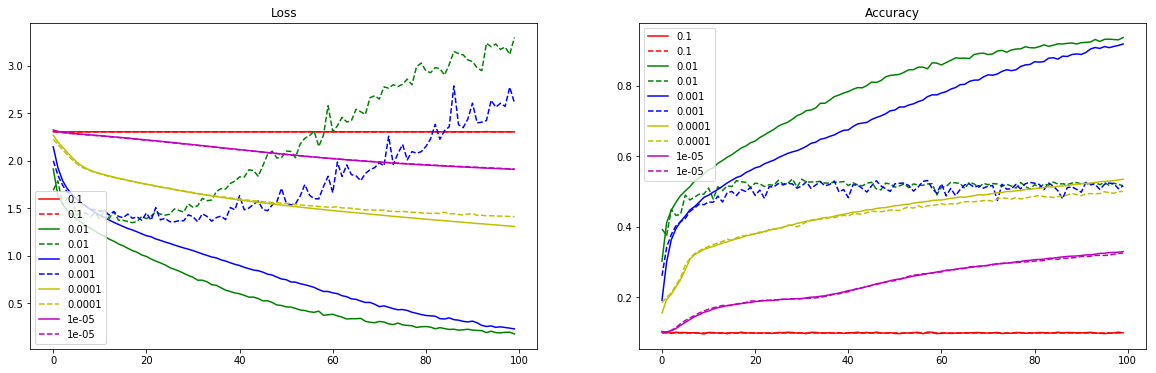

In [11]:
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
for i, cond in enumerate(result.keys()):
    
    ax.plot(range(len(result[cond]['train_loss'])),result[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    ax.plot(range(len(result[cond]['valid_loss'])),result[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
    ax.set_title("Loss")
    ax.legend()
    ax1.plot(range(len(result[cond]['train_acc'])),result[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    ax1.plot(range(len(result[cond]['valid_acc'])),result[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
    ax1.set_title("Accuracy")
    ax1.legend()
plt.show()

# Optimizer vs Learning Rate Grid Search
- optimizer: SGD / RMSProp / AdaGrad / Adam
- learning rate: 1e-1 / 1e-2 / 1e-3 / 1e-4 /1e-5

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total para

Epoch 50/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 51/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 52/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 53/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 54/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 55/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 56/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 57/100


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 38us/step - loss: 14.4127 - acc: 0.1004 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_lo

Epoch 59/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 60/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 61/100
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 62/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 63/100
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 64/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 65/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 66/100


Epoch 8/100
50000/50000 [==============================] - 1s 29us/step - loss: 1.4464 - acc: 0.4829 - val_loss: 1.4597 - val_acc: 0.4790
Epoch 9/100
50000/50000 [==============================] - 1s 29us/step - loss: 1.4207 - acc: 0.4901 - val_loss: 1.4471 - val_acc: 0.4905
Epoch 10/100
50000/50000 [==============================] - 1s 29us/step - loss: 1.3855 - acc: 0.5055 - val_loss: 1.4431 - val_acc: 0.4864
Epoch 11/100
50000/50000 [==============================] - 1s 29us/step - loss: 1.3590 - acc: 0.5161 - val_loss: 1.4334 - val_acc: 0.4854
Epoch 12/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.3392 - acc: 0.5215 - val_loss: 1.4364 - val_acc: 0.4897
Epoch 13/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.3075 - acc: 0.5343 - val_loss: 1.4027 - val_acc: 0.5096
Epoch 14/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.2894 - acc: 0.5406 - val_loss: 1.4004 - val_acc: 0.5074
Epoch 15/100
50000/50000 [===

Epoch 67/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.5087 - acc: 0.8185 - val_loss: 2.1927 - val_acc: 0.5064
Epoch 68/100
50000/50000 [==============================] - 1s 29us/step - loss: 0.4941 - acc: 0.8242 - val_loss: 2.2012 - val_acc: 0.5000
Epoch 69/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.4941 - acc: 0.8223 - val_loss: 2.2515 - val_acc: 0.4991
Epoch 70/100
50000/50000 [==============================] - 1s 29us/step - loss: 0.4855 - acc: 0.8263 - val_loss: 2.2822 - val_acc: 0.4988
Epoch 71/100
50000/50000 [==============================] - 1s 29us/step - loss: 0.4904 - acc: 0.8234 - val_loss: 2.2467 - val_acc: 0.4963
Epoch 72/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.4692 - acc: 0.8321 - val_loss: 2.3667 - val_acc: 0.4907
Epoch 73/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.4562 - acc: 0.8368 - val_loss: 2.3802 - val_acc: 0.4993
Epoch 74/100
50000/50000 [=

50000/50000 [==============================] - 1s 29us/step - loss: 0.5951 - acc: 0.7956 - val_loss: 1.6560 - val_acc: 0.5221
Epoch 76/100
50000/50000 [==============================] - 1s 29us/step - loss: 0.5809 - acc: 0.8016 - val_loss: 1.6131 - val_acc: 0.5337
Epoch 77/100
50000/50000 [==============================] - 1s 29us/step - loss: 0.5707 - acc: 0.8070 - val_loss: 1.6721 - val_acc: 0.5256
Epoch 78/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.5603 - acc: 0.8090 - val_loss: 1.6466 - val_acc: 0.5296
Epoch 79/100
50000/50000 [==============================] - 1s 29us/step - loss: 0.5492 - acc: 0.8116 - val_loss: 1.6758 - val_acc: 0.5291
Epoch 80/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.5401 - acc: 0.8157 - val_loss: 1.7797 - val_acc: 0.5199
Epoch 81/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.5344 - acc: 0.8175 - val_loss: 1.7130 - val_acc: 0.5266
Epoch 82/100
50000/50000 [==============

50000/50000 [==============================] - 1s 29us/step - loss: 1.2647 - acc: 0.5575 - val_loss: 1.3888 - val_acc: 0.5072
Epoch 84/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.2601 - acc: 0.5597 - val_loss: 1.3826 - val_acc: 0.5085
Epoch 85/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.2577 - acc: 0.5597 - val_loss: 1.3848 - val_acc: 0.5076
Epoch 86/100
50000/50000 [==============================] - 1s 29us/step - loss: 1.2536 - acc: 0.5607 - val_loss: 1.3918 - val_acc: 0.5047
Epoch 87/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.2505 - acc: 0.5625 - val_loss: 1.3840 - val_acc: 0.5074
Epoch 88/100
50000/50000 [==============================] - 1s 29us/step - loss: 1.2477 - acc: 0.5620 - val_loss: 1.3856 - val_acc: 0.5096
Epoch 89/100
50000/50000 [==============================] - 1s 30us/step - loss: 1.2432 - acc: 0.5652 - val_loss: 1.3800 - val_acc: 0.5054
Epoch 90/100
50000/50000 [==============

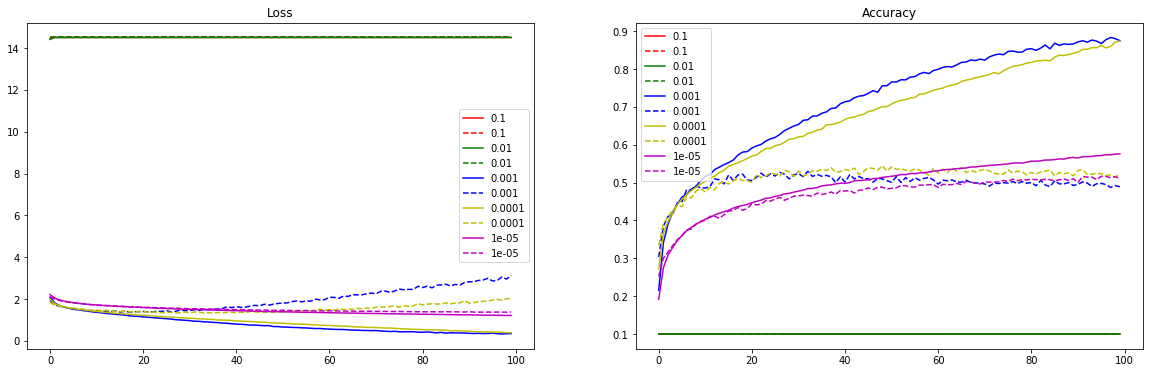

In [12]:
LEARNING_RATE_LIST = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
result = {}
for LR in LEARNING_RATE_LIST:
    #create new mlp model
    model = build_mlp()
    model.summary()
    #set HPs
    LEARNING_RATE = LR
    EPOCHS = 100
    BATCH_SIZE = 256
    MOMENTUM = 0.95
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    #training
    model = train_model(model, EPOCHS, BATCH_SIZE, optimizer)
    #record result
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    result[str(LR)] = {'train_loss': model.history.history['loss'],
                       'valid_loss': model.history.history['val_loss'],
                       'train_acc': model.history.history['acc'],
                       'valid_acc': model.history.history['val_acc']
                      }
    
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
for i, cond in enumerate(result.keys()):
    
    ax.plot(range(len(result[cond]['train_loss'])),result[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    ax.plot(range(len(result[cond]['valid_loss'])),result[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
    ax.set_title("Loss")
    ax.legend()
    ax1.plot(range(len(result[cond]['train_acc'])),result[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    ax1.plot(range(len(result[cond]['valid_acc'])),result[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
    ax1.set_title("Accuracy")
    ax1.legend()
plt.show()             

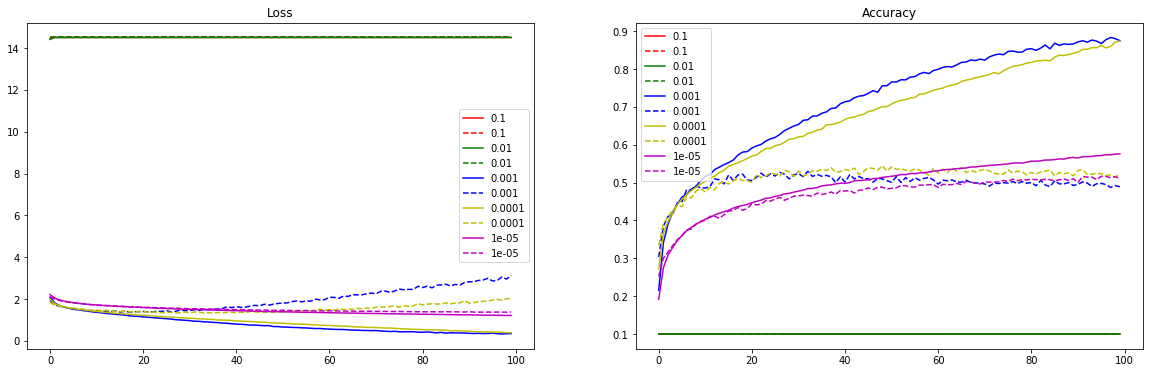

In [13]:
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
for i, cond in enumerate(result.keys()):
    
    ax.plot(range(len(result[cond]['train_loss'])),result[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    ax.plot(range(len(result[cond]['valid_loss'])),result[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
    ax.set_title("Loss")
    ax.legend()
    ax1.plot(range(len(result[cond]['train_acc'])),result[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    ax1.plot(range(len(result[cond]['valid_acc'])),result[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
    ax1.set_title("Accuracy")
    ax1.legend()
plt.show()             

In [14]:
LEARNING_RATE_LIST = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
result = {}
for LR in LEARNING_RATE_LIST:
    #create new mlp model
    model = build_mlp()
    model.summary()
    #set HPs
    LEARNING_RATE = LR
    EPOCHS = 100
    BATCH_SIZE = 256
    MOMENTUM = 0.95
    optimizer = keras.optimizers.Adagrad(lr=LEARNING_RATE)
    #training
    model = train_model(model, EPOCHS, BATCH_SIZE, optimizer)
    #record result
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    result[str(LR)] = {'train_loss': model.history.history['loss'],
                       'valid_loss': model.history.history['val_loss'],
                       'train_acc': model.history.history['acc'],
                       'valid_acc': model.history.history['val_acc']
                      }
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total para

Epoch 50/100
50000/50000 [==============================] - 1s 25us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 51/100
50000/50000 [==============================] - 1s 25us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 52/100
50000/50000 [==============================] - 1s 25us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 53/100
50000/50000 [==============================] - 1s 25us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 54/100
50000/50000 [==============================] - 1s 25us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 55/100
50000/50000 [==============================] - 1s 25us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 56/100
50000/50000 [==============================] - 1s 25us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 57/100


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 32us/step - loss: 4.6179 - acc: 0.1666 - val_loss: 1.9879 - val_acc: 0.2623
Epoch 2/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.9128 - acc: 0.3001 - val_loss: 1.8200 - val_acc: 0.3396
Epoch 3/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.8000 - acc: 0.3481 - val_loss: 1.7779 - val_acc: 0.3569
Epoch 4/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.7289 - acc: 0.3771 - val_loss: 1.7109 - val_acc: 0.3804
Epoch 5/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.6811 - acc: 0.3953 - val_loss: 1.7090 - val_acc: 0.3766
Epoch 6/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.6360 - acc: 0.4157 - val_loss: 1.6625 - val_acc: 0.3963
Epoch 7/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.6031 - acc: 0.4264 - val_loss: 1.6807 - 

50000/50000 [==============================] - 1s 25us/step - loss: 1.6290 - acc: 0.4286 - val_loss: 1.6833 - val_acc: 0.3928
Epoch 9/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.6088 - acc: 0.4328 - val_loss: 1.6188 - val_acc: 0.4237
Epoch 10/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.5891 - acc: 0.4408 - val_loss: 1.6064 - val_acc: 0.4329
Epoch 11/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.5736 - acc: 0.4444 - val_loss: 1.6165 - val_acc: 0.4179
Epoch 12/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.5605 - acc: 0.4531 - val_loss: 1.5741 - val_acc: 0.4423
Epoch 13/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.5455 - acc: 0.4569 - val_loss: 1.5622 - val_acc: 0.4454
Epoch 14/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.5334 - acc: 0.4613 - val_loss: 1.5626 - val_acc: 0.4524
Epoch 15/100
50000/50000 [===============

50000/50000 [==============================] - 1s 27us/step - loss: 1.2409 - acc: 0.5660 - val_loss: 1.3799 - val_acc: 0.5118
Epoch 68/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.2389 - acc: 0.5665 - val_loss: 1.3679 - val_acc: 0.5168
Epoch 69/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.2366 - acc: 0.5657 - val_loss: 1.3681 - val_acc: 0.5158
Epoch 70/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.2327 - acc: 0.5681 - val_loss: 1.4272 - val_acc: 0.4932
Epoch 71/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.2309 - acc: 0.5685 - val_loss: 1.3803 - val_acc: 0.5133
Epoch 72/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.2280 - acc: 0.5702 - val_loss: 1.3717 - val_acc: 0.5135
Epoch 73/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.2245 - acc: 0.5720 - val_loss: 1.3702 - val_acc: 0.5157
Epoch 74/100
50000/50000 [==============

50000/50000 [==============================] - 1s 25us/step - loss: 1.6579 - acc: 0.4176 - val_loss: 1.6651 - val_acc: 0.4070
Epoch 76/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.6566 - acc: 0.4166 - val_loss: 1.6634 - val_acc: 0.4100
Epoch 77/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.6552 - acc: 0.4175 - val_loss: 1.6620 - val_acc: 0.4111
Epoch 78/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.6539 - acc: 0.4182 - val_loss: 1.6608 - val_acc: 0.4095
Epoch 79/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.6524 - acc: 0.4182 - val_loss: 1.6594 - val_acc: 0.4121
Epoch 80/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.6511 - acc: 0.4191 - val_loss: 1.6584 - val_acc: 0.4111
Epoch 81/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.6498 - acc: 0.4195 - val_loss: 1.6571 - val_acc: 0.4115
Epoch 82/100
50000/50000 [==============

50000/50000 [==============================] - 1s 25us/step - loss: 2.0392 - acc: 0.2753 - val_loss: 2.0415 - val_acc: 0.2722
Epoch 84/100
50000/50000 [==============================] - 1s 25us/step - loss: 2.0381 - acc: 0.2754 - val_loss: 2.0404 - val_acc: 0.2724
Epoch 85/100
50000/50000 [==============================] - 1s 25us/step - loss: 2.0371 - acc: 0.2756 - val_loss: 2.0394 - val_acc: 0.2724
Epoch 86/100
50000/50000 [==============================] - 1s 25us/step - loss: 2.0361 - acc: 0.2759 - val_loss: 2.0384 - val_acc: 0.2730
Epoch 87/100
50000/50000 [==============================] - 1s 25us/step - loss: 2.0350 - acc: 0.2763 - val_loss: 2.0373 - val_acc: 0.2736
Epoch 88/100
50000/50000 [==============================] - 1s 25us/step - loss: 2.0340 - acc: 0.2767 - val_loss: 2.0363 - val_acc: 0.2739
Epoch 89/100
50000/50000 [==============================] - 1s 25us/step - loss: 2.0330 - acc: 0.2770 - val_loss: 2.0353 - val_acc: 0.2739
Epoch 90/100
50000/50000 [==============

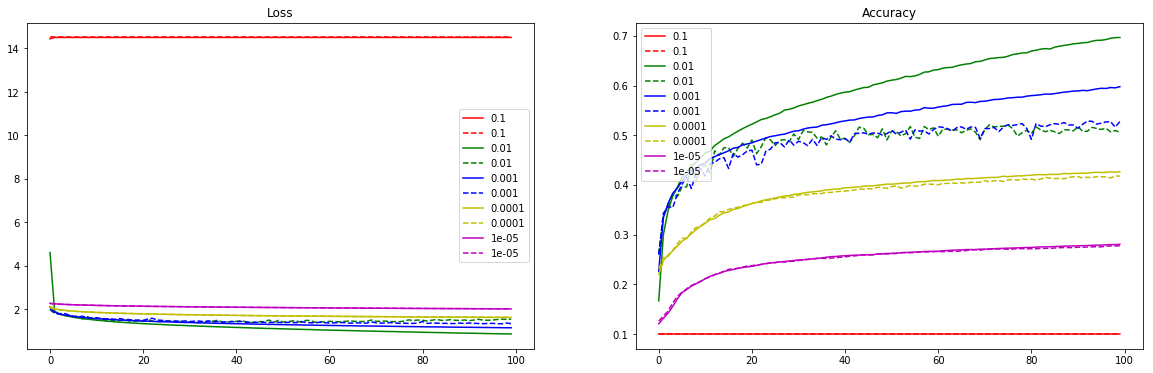

In [15]:
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
for i, cond in enumerate(result.keys()):
    
    ax.plot(range(len(result[cond]['train_loss'])),result[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    ax.plot(range(len(result[cond]['valid_loss'])),result[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
    ax.set_title("Loss")
    ax.legend()
    ax1.plot(range(len(result[cond]['train_acc'])),result[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    ax1.plot(range(len(result[cond]['valid_acc'])),result[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
    ax1.set_title("Accuracy")
    ax1.legend()
plt.show()             

In [16]:
LEARNING_RATE_LIST = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
result = {}
for LR in LEARNING_RATE_LIST:
    #create new mlp model
    model = build_mlp()
    model.summary()
    #set HPs
    LEARNING_RATE = LR
    EPOCHS = 100
    BATCH_SIZE = 256
    MOMENTUM = 0.95
    optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE)
    #training
    model = train_model(model, EPOCHS, BATCH_SIZE, optimizer)
    #record result
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    result[str(LR)] = {'train_loss': model.history.history['loss'],
                       'valid_loss': model.history.history['val_loss'],
                       'train_acc': model.history.history['acc'],
                       'valid_acc': model.history.history['val_acc']
                      }
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total para

Epoch 50/100
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 51/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 52/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 53/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 54/100
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 55/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 56/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 57/100


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 33us/step - loss: 14.4476 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_lo

Epoch 59/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 60/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 61/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 62/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 63/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 64/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 65/100
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 66/100


Epoch 8/100
50000/50000 [==============================] - 1s 25us/step - loss: 1.5778 - acc: 0.4361 - val_loss: 1.6666 - val_acc: 0.4065
Epoch 9/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.5420 - acc: 0.4510 - val_loss: 1.6636 - val_acc: 0.4059
Epoch 10/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.5107 - acc: 0.4609 - val_loss: 1.6231 - val_acc: 0.4228
Epoch 11/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.4879 - acc: 0.4670 - val_loss: 1.6196 - val_acc: 0.4267
Epoch 12/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.4589 - acc: 0.4791 - val_loss: 1.6243 - val_acc: 0.4248
Epoch 13/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.4352 - acc: 0.4870 - val_loss: 1.5444 - val_acc: 0.4560
Epoch 14/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.4120 - acc: 0.4935 - val_loss: 1.6506 - val_acc: 0.4184
Epoch 15/100
50000/50000 [===

Epoch 67/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.6179 - acc: 0.7782 - val_loss: 2.3292 - val_acc: 0.4814
Epoch 68/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.6185 - acc: 0.7761 - val_loss: 2.2544 - val_acc: 0.4855
Epoch 69/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.6060 - acc: 0.7809 - val_loss: 2.2390 - val_acc: 0.4797
Epoch 70/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.5930 - acc: 0.7877 - val_loss: 2.5247 - val_acc: 0.4520
Epoch 71/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.5970 - acc: 0.7850 - val_loss: 2.4117 - val_acc: 0.4874
Epoch 72/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.5882 - acc: 0.7893 - val_loss: 2.2962 - val_acc: 0.4934
Epoch 73/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.5769 - acc: 0.7939 - val_loss: 2.3173 - val_acc: 0.4884
Epoch 74/100
50000/50000 [=

50000/50000 [==============================] - 1s 28us/step - loss: 0.7491 - acc: 0.7379 - val_loss: 1.5698 - val_acc: 0.5095
Epoch 76/100
50000/50000 [==============================] - 1s 27us/step - loss: 0.7393 - acc: 0.7430 - val_loss: 1.4741 - val_acc: 0.5396
Epoch 77/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.7316 - acc: 0.7451 - val_loss: 1.5457 - val_acc: 0.5141
Epoch 78/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.7208 - acc: 0.7476 - val_loss: 1.7956 - val_acc: 0.4596
Epoch 79/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.7160 - acc: 0.7505 - val_loss: 1.5220 - val_acc: 0.5236
Epoch 80/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.7050 - acc: 0.7529 - val_loss: 1.5866 - val_acc: 0.5083
Epoch 81/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.6965 - acc: 0.7581 - val_loss: 1.5606 - val_acc: 0.5265
Epoch 82/100
50000/50000 [==============

50000/50000 [==============================] - 1s 26us/step - loss: 1.3351 - acc: 0.5332 - val_loss: 1.4111 - val_acc: 0.4974
Epoch 84/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.3324 - acc: 0.5355 - val_loss: 1.4232 - val_acc: 0.4985
Epoch 85/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.3289 - acc: 0.5366 - val_loss: 1.4778 - val_acc: 0.4729
Epoch 86/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.3255 - acc: 0.5365 - val_loss: 1.4145 - val_acc: 0.4986
Epoch 87/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.3233 - acc: 0.5384 - val_loss: 1.4165 - val_acc: 0.4974
Epoch 88/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.3190 - acc: 0.5406 - val_loss: 1.4128 - val_acc: 0.4964
Epoch 89/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.3164 - acc: 0.5420 - val_loss: 1.4170 - val_acc: 0.5006
Epoch 90/100
50000/50000 [==============

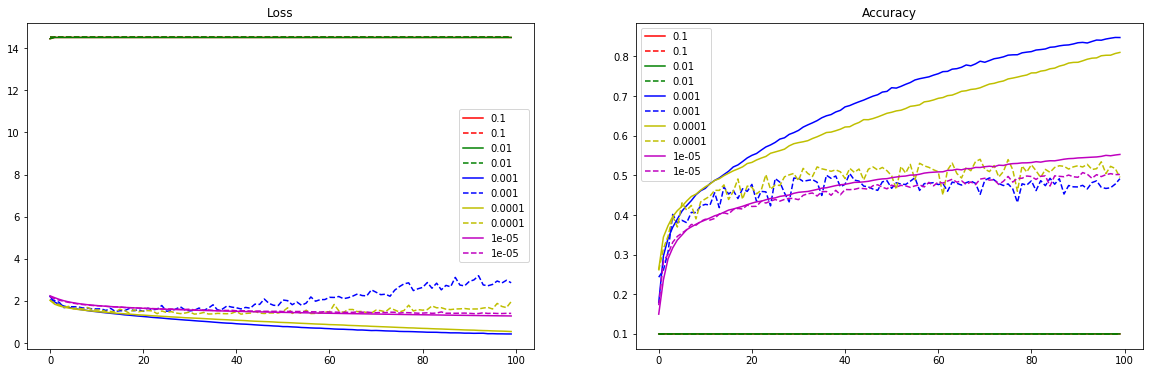

In [17]:
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
for i, cond in enumerate(result.keys()):
    
    ax.plot(range(len(result[cond]['train_loss'])),result[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    ax.plot(range(len(result[cond]['valid_loss'])),result[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
    ax.set_title("Loss")
    ax.legend()
    ax1.plot(range(len(result[cond]['train_acc'])),result[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    ax1.plot(range(len(result[cond]['valid_acc'])),result[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
    ax1.set_title("Accuracy")
    ax1.legend()
plt.show()             

In [18]:
LEARNING_RATE_LIST = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
result = {}
for LR in LEARNING_RATE_LIST:
    #create new mlp model
    model = build_mlp()
    model.summary()
    #set HPs
    LEARNING_RATE = LR
    EPOCHS = 100
    BATCH_SIZE = 256
    MOMENTUM = 0.95
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    #training
    model = train_model(model, EPOCHS, BATCH_SIZE, optimizer)
    #record result
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    result[str(LR)] = {'train_loss': model.history.history['loss'],
                       'valid_loss': model.history.history['val_loss'],
                       'train_acc': model.history.history['acc'],
                       'valid_acc': model.history.history['val_acc']
                      }
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total para

Epoch 50/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 51/100
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 52/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 53/100
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 54/100
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 55/100
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 56/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 57/100


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 39us/step - loss: 14.4348 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_lo

Epoch 59/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 60/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 61/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 62/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 63/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 64/100
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 65/100
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 66/100


Epoch 8/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.4370 - acc: 0.4869 - val_loss: 1.4591 - val_acc: 0.4822
Epoch 9/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.4107 - acc: 0.4973 - val_loss: 1.4471 - val_acc: 0.4825
Epoch 10/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.3778 - acc: 0.5078 - val_loss: 1.4180 - val_acc: 0.5015
Epoch 11/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.3500 - acc: 0.5180 - val_loss: 1.4441 - val_acc: 0.4823
Epoch 12/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.3286 - acc: 0.5260 - val_loss: 1.4212 - val_acc: 0.4975
Epoch 13/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.3036 - acc: 0.5363 - val_loss: 1.4162 - val_acc: 0.5027
Epoch 14/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.2883 - acc: 0.5385 - val_loss: 1.4892 - val_acc: 0.4733
Epoch 15/100
50000/50000 [===

Epoch 67/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.5259 - acc: 0.8103 - val_loss: 2.2019 - val_acc: 0.5118
Epoch 68/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.4982 - acc: 0.8208 - val_loss: 2.2279 - val_acc: 0.5039
Epoch 69/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.5184 - acc: 0.8141 - val_loss: 2.2644 - val_acc: 0.5090
Epoch 70/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.4889 - acc: 0.8277 - val_loss: 2.2525 - val_acc: 0.5129
Epoch 71/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.4981 - acc: 0.8207 - val_loss: 2.3203 - val_acc: 0.5040
Epoch 72/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.4781 - acc: 0.8288 - val_loss: 2.2883 - val_acc: 0.5123
Epoch 73/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.4710 - acc: 0.8319 - val_loss: 2.3338 - val_acc: 0.5001
Epoch 74/100
50000/50000 [=

50000/50000 [==============================] - 1s 27us/step - loss: 0.5994 - acc: 0.7959 - val_loss: 1.6139 - val_acc: 0.5322
Epoch 76/100
50000/50000 [==============================] - 1s 27us/step - loss: 0.5962 - acc: 0.7965 - val_loss: 1.5996 - val_acc: 0.5366
Epoch 77/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.5831 - acc: 0.7996 - val_loss: 1.6539 - val_acc: 0.5296
Epoch 78/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.5757 - acc: 0.8037 - val_loss: 1.7204 - val_acc: 0.5151
Epoch 79/100
50000/50000 [==============================] - 1s 27us/step - loss: 0.5640 - acc: 0.8062 - val_loss: 1.6583 - val_acc: 0.5332
Epoch 80/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.5570 - acc: 0.8107 - val_loss: 1.7576 - val_acc: 0.5147
Epoch 81/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.5469 - acc: 0.8125 - val_loss: 1.7037 - val_acc: 0.5291
Epoch 82/100
50000/50000 [==============

50000/50000 [==============================] - 1s 28us/step - loss: 1.2817 - acc: 0.5578 - val_loss: 1.4013 - val_acc: 0.5110
Epoch 84/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.2798 - acc: 0.5592 - val_loss: 1.3964 - val_acc: 0.5115
Epoch 85/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.2776 - acc: 0.5574 - val_loss: 1.3956 - val_acc: 0.5095
Epoch 86/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.2725 - acc: 0.5608 - val_loss: 1.3991 - val_acc: 0.5056
Epoch 87/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.2691 - acc: 0.5593 - val_loss: 1.3937 - val_acc: 0.5094
Epoch 88/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.2658 - acc: 0.5609 - val_loss: 1.3908 - val_acc: 0.5115
Epoch 89/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.2623 - acc: 0.5637 - val_loss: 1.3924 - val_acc: 0.5142
Epoch 90/100
50000/50000 [==============

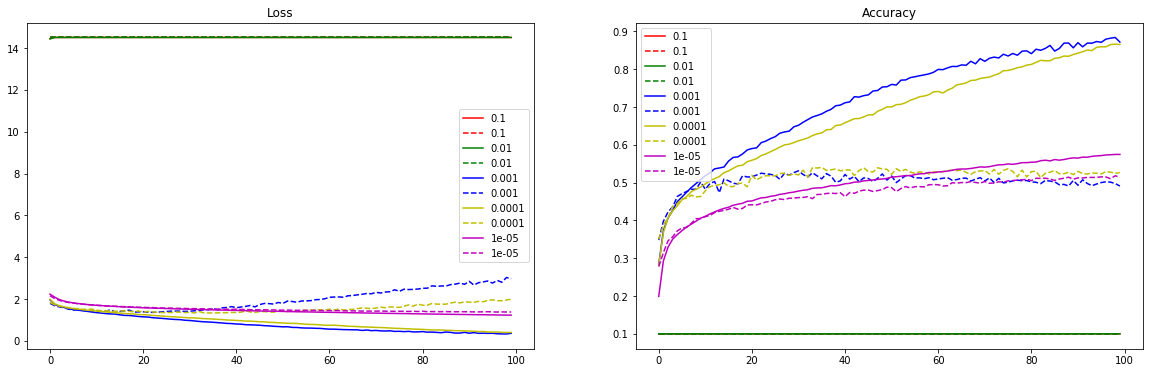

In [19]:
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
for i, cond in enumerate(result.keys()):
    
    ax.plot(range(len(result[cond]['train_loss'])),result[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    ax.plot(range(len(result[cond]['valid_loss'])),result[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
    ax.set_title("Loss")
    ax.legend()
    ax1.plot(range(len(result[cond]['train_acc'])),result[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    ax1.plot(range(len(result[cond]['valid_acc'])),result[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
    ax1.set_title("Accuracy")
    ax1.legend()
plt.show()             

In [ ]:
optimizer_result = {}
result = {}
LEARNING_RATE_LIST = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
OPTIMIZER_LIST = ['SGD', 'RMSprop', 'AdaGrad', 'Adam']
                 
for LR in LEARNING_RATE_LIST:
    #set HPs
    LEARNING_RATE = LR
    EPOCHS = 100
    BATCH_SIZE = 256
    MOMENTUM = 0.95
    # OPTIMIZER_SEARCH
    for opti in OPTIMIZER_LIST:
        #create new mlp model
        model = build_mlp()
        model.summary()
        if opti == 'SGD':
            optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        elif opti == 'RMSprop':
            optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE)
        elif opti == 'AdaGrad':
            optimizer = keras.optimizers.Adagrad(lr=LEARNING_RATE)
        elif opti == 'Adam':
            optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
        #training
        model = train_model(model, EPOCHS, BATCH_SIZE, optimizer)
        #record result
        train_loss = model.history.history['loss']
        valid_loss = model.history.history['val_loss']
        train_acc = model.history.history['acc']
        valid_acc = model.history.history['val_acc']
        optimizer_result[opti]= {'train_loss': train_loss,
                                   'valid_loss': valid_loss,
                                   'train_acc': train_acc, 
                                   'valid_acc': valid_acc                                  }
        
    result[str(LEARNING_RATE)] = optimizer_result

In [ ]:
color_bar = ["r", "g", "b", "y", "m", "k"]
for LR in LEARNING_RATE_LIST:
    LR = str(LR)
    fig = plt.figure(figsize=(20, 6))
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)
    for i, opti in enumerate(result[LR].keys()):
        ax.plot(range(len(result[LR][opti]['train_loss'])),result[LR][opti]['train_loss'], '-', label=opti, color=color_bar[i])
        ax.plot(range(len(result[LR][opti]['valid_loss'])),result[LR][opti]['valid_loss'], '--', label=opti, color=color_bar[i])
        ax.set_title("Loss")
        ax.legend()
        ax1.plot(range(len(result[LR][opti]['train_acc'])),result[LR][opti]['train_acc'], '-', label=opti, color=color_bar[i])
        ax1.plot(range(len(result[LR][opti]['valid_acc'])),result[LR][opti]['valid_acc'], '--', label=opti, color=color_bar[i])
        ax1.set_title("Accuracy")
        ax1.legend()
plt.show()             